In [217]:
%matplotlib inline
import pymongo

import numpy as np
import pandas as pd

import seaborn as sns
# import bokeh
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [218]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
database = client['thesis']
db = database['dumps']

dumps_list = list(db.find())

In [219]:
# Configuration of matplotlib

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=12) 
plt.rc('figure', titlesize=18)

plt.rcParams['figure.figsize'] = [20, 10]  # Scale up plots 


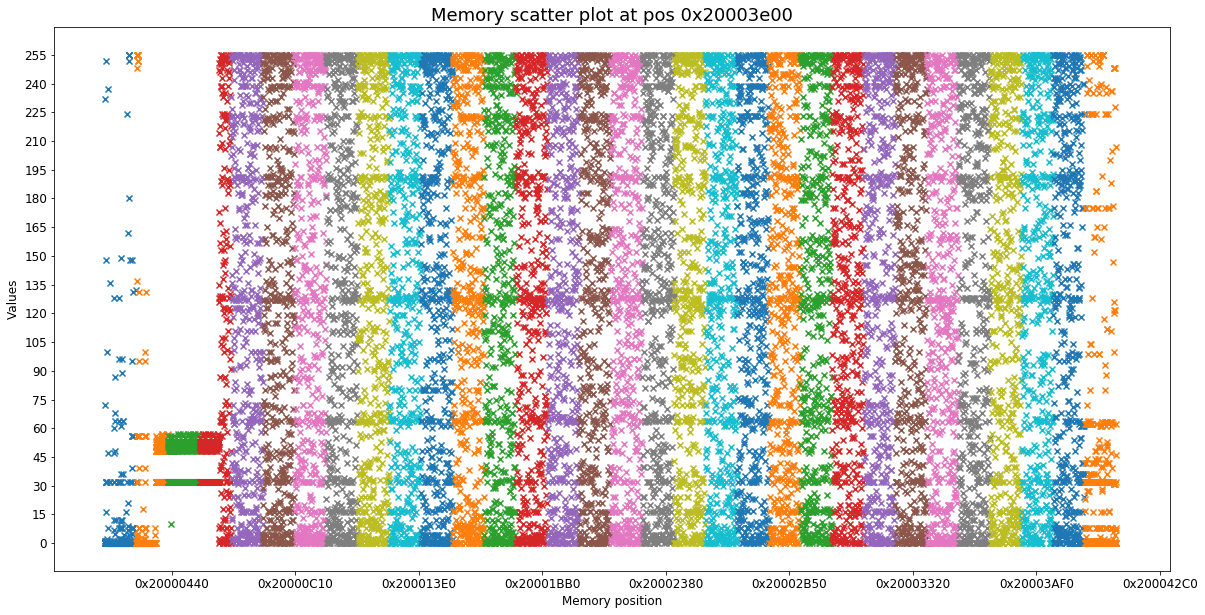

In [228]:
mem_pos, mem_off, mem_val = [], [], []

NUM_PLOTS = 32

for plot in range(0, NUM_PLOTS):
    mem_val = dumps_list[plot]['data']
    mem_off = dumps_list[plot]['mem_pos']

    mem_pos = []
    for i in range(0, 512):
        mem_pos.append(int(mem_off, 16) + i)


    plt.scatter(mem_pos, mem_val, marker='x')
    plt.title('Memory scatter plot at pos ' + str(mem_off))
    plt.xlabel('Memory position')
    plt.ylabel('Values')
    ax = plt.gca()
    ax.yaxis.set_major_locator(plt.MaxNLocator(20))
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    xlabels = map(lambda t: '0x%08X' % int(t), ax.get_xticks())    
    ax.set_xticklabels(xlabels);
    plt.grid()
    # plt.show() # To show every plot